# \[STBDA\] 05wk: tensorflow,keras

김보람  
2023-06-20

> 해당 강의노트는 전북대학교 최규빈교수님
> [STBDA2022](https://guebin.github.io/STBDA2022/) 자료임

### imports

In [18]:
# conda install -c conda-forge python-graphviz -y

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-06-20 13:43:31.300590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

In [2]:
import tensorflow.experimental.numpy as tnp

In [3]:
tnp.experimental_enable_numpy_behavior()

### 최적화의 문제

`-` $loss=(\frac{1}{2}\beta-1)^2$

`-` 기존에 했던 방법은 수식을 알고 있어야 한다는 단점이 있음

### tf.keras.optimizers를 이용한 최적화방법

#### 방법1: opt.apply_gradients()를 이용

In [4]:
alpha= 0.01/6

In [5]:
beta= tf.Variable(-10.0)

In [6]:
opt = tf.keras.optimizers.SGD(alpha)

-   `tf.keras.optimizers` = `tp.optimizers` 다 똑같은것.

`-` iter1

In [7]:
with tf.GradientTape() as tape:
    tape.watch(beta)
    loss=(beta/2-1)**2
slope = tape.gradient(loss,beta)

In [8]:
opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha)
beta

`-` iter2

In [9]:
with tf.GradientTape() as tape:
    tape.watch(beta)
    loss=(beta/2-1)**2
slope = tape.gradient(loss,beta)
opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha)
beta

`-` for문으로 정리

In [10]:
alpha= 0.01/6
beta= tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)

In [11]:
for epoc in range(10000):
    with tf.GradientTape() as tape:
        tape.watch(beta)
        loss=(beta/2-1)**2
    slope = tape.gradient(loss,beta)
    opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha)
    beta

In [12]:
beta

-   opt.apply_gradients()의 입력은 pair 의 list

#### 방법2: opt.minimize()

In [13]:
alpha= 0.01/6
beta= tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)

In [14]:
loss_fn = lambda: (beta/2-1)**2

-   `lambda x: x**2` \<=\> `lambda(x)=x^2`
-   `lambda x,y: x+y` \<=\> `lambda(x,y)=x+y`
-   `lambda: y` \<=\> `lambda()=y`, 입력이 없으며 출력은 항상 y인 함수

In [15]:
loss_fn() # 입력은 없고 출력은 뭔가 계산되는 함수

`-` iter 1

-   오류난당..

In [107]:
opt.minimize?

In [16]:
opt.minimize(loss_fn, beta)

In [18]:
beta

`-` iter2

In [19]:
opt.minimize(loss_fn, beta)
beta

`-` for문으로 정리하면

In [20]:
alpha= 0.01/6
beta= tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)
loss_fn = lambda: (beta/2-1)**2
for epoc in range(10000):
    opt.minimize(loss_fn, beta)
beta

### 회귀분석 문제

`-` ${\bf y} \approx 2.5 + 4.0 {\bf x}$

In [21]:
tnp.random.seed(43052)
N = 200
x = tnp.linspace(0,1,N)
epsilon = tnp.random.randn(N)*0.5
y = 2.5+4*x + epsilon
y_true = 2.5+4*x

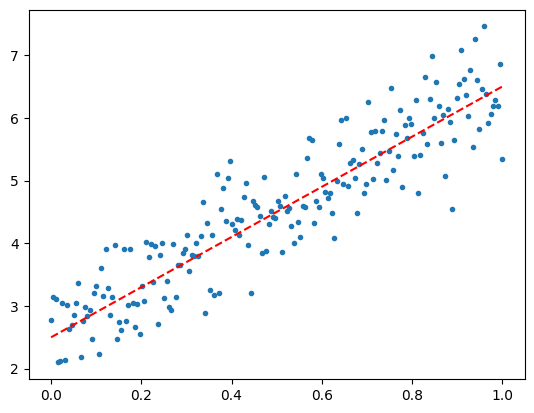

In [22]:
plt.plot(x,y,'.')
plt.plot(x,y_true,'r--')

### 이론적 풀이

#### 풀이1: 스칼라버전

`-` 포인트 - $S_{xx}=$, $S_{xy}=$ - $\hat{\beta}_0=$, $\hat{\beta}_1=$

`-` 풀이

In [23]:
Sxx = sum((x-x.mean())**2)
Sxy = sum((x-x.mean())*(y-y.mean()))

In [24]:
beta1_hat = Sxy/Sxx
beta1_hat

In [25]:
beta0_hat = y.mean() - x.mean()*beta1_hat
beta0_hat

#### 풀이2: 벡터버전

`-` 포인트 - $\hat{\beta}=(X'X)^{-1}X'y$

`-` 풀이

In [26]:
y=y.reshape(N,1)
X=tf.stack([tf.ones(N,dtype=tf.float64),x],axis=1)
y.shape,X.shape

In [27]:
tf.linalg.inv(X.T @ X ) @ X.T @ y

#### 풀이3: 벡터버전, 손실함수의 도함수이용

`-` 포인트 - $loss'(\beta)=-2X'y +2X'X\beta$ -
$\beta_{new} = \beta_{old} - \alpha \times loss'(\beta_{old})$

`-` 풀이

In [28]:
y=y.reshape(N,1)
y.shape,X.shape

In [29]:
beta_hat = tnp.array([-5,10]).reshape(2,1)
beta_hat

In [30]:
slope = (-2*X.T @ y + 2*X.T @ X @ beta_hat) / N
slope

In [31]:
alpha= 0.1

In [32]:
step = slope*alpha
step

In [33]:
for epoc in range(1000):
    slope = (-2*X.T @ y + 2*X.T @ X @ beta_hat)/N
    beta_hat = beta_hat - alpha* slope

In [34]:
beta_hat

### GradientTape를 이용

#### 풀이1: 벡터버전

`-` 포인트

``` python
## 포인트코드1: 그레디언트 테입
with tf.GradientTape() as tape:
    loss =
## 포인트코드2: 미분
slope = tape.gradient(loss,beta_hat)
## 포인트코드3: update
beta_hat.assign_sub(slope*alph)
```

`-` 풀이

In [35]:
y=y.reshape(N,1)
y.shape,X.shape

In [36]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

In [37]:
alpha=0.1

In [38]:
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    beta_hat.assign_sub(alpha*slope)

In [39]:
beta_hat

#### 풀이2: 스칼라버전

`-` 포인트

``` python
## 포인트코드: 미분
slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
```

`-` 풀이

In [40]:
y=y.reshape(-1)
y.shape,x.shape

In [41]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [42]:
alpha=0.1

In [43]:
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat= beta0_hat + x*beta1_hat
        loss= tf.reduce_sum((y-yhat)**2)/N #loss= sum((y-yhat)**2)/N (이거로하면 좀 느림)
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
    beta0_hat.assign_sub(alpha*slope0)
    beta1_hat.assign_sub(alpha*slope1)

In [44]:
beta0_hat,beta1_hat

### GradientTape + opt.apply_gradients

#### 풀이1: 벡터버전

`-` 포인트

``` python
## 포인트코드: 업데이트
opt.apply_gradients([(slope,beta_hat)])  ## pair의 list가 입력
```

`-` 풀이

In [45]:
y=y.reshape(N,1)
y.shape,X.shape

In [46]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

In [47]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [48]:
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])
    #beta_hat.assign_sub(alpha*slope)

In [49]:
beta_hat

#### 풀이2: 스칼라버전

`-` 포인트

``` python
## 포인트코드: 업데이트
opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)]) ## pair의 list가 입력
```

`-` 풀이

In [50]:
y=y.reshape(-1)
y.shape,x.shape

In [51]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [52]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [53]:
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat= beta0_hat + beta1_hat*x #X@beta_hat
        loss= tf.reduce_sum((y-yhat)**2) / N
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
    opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)])

In [54]:
beta0_hat,beta1_hat

### opt.minimize

#### 풀이1: 벡터버전, 사용자정의 손실함수 with lambda

`-` 풀이

In [55]:
y=y.reshape(N,1)
y.shape,X.shape

In [56]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

In [57]:
loss_fn = lambda: (y-X@beta_hat).T @ (y-X@beta_hat) / N

In [58]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [59]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)

In [56]:
beta_hat

#### 풀이2: 스칼라버전, 사용자정의 손실함수 with lambda

`-` 포인트

``` python
## 포인트코드: 미분 & 업데이트 = minimize
opt.minimize(loss_fn,[beta0_hat,beta1_hat])
```

`-` 풀이

In [60]:
y=y.reshape(-1)
y.shape,x.shape

In [61]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [62]:
loss_fn = lambda: tf.reduce_sum((y-beta0_hat-beta1_hat*x )**2) / N

In [63]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [64]:
for epoc in range(1000):
    opt.minimize(loss_fn,[beta0_hat,beta1_hat])

In [65]:
beta0_hat,beta1_hat

#### 풀이3: 벡터버전, 사용자정의 (짧은) 손실함수

`-` 포인트

``` python
## 포인트코드: 손실함수정의
def loss_fn():
    return ??
```

`-` 풀이

In [66]:
y=y.reshape(N,1)
y.shape,X.shape

In [67]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

In [68]:
def loss_fn():
    return (y-X@beta_hat).T @ (y-X@beta_hat) / N

In [69]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [70]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)

In [71]:
beta_hat

#### 풀이4: 벡터버전, 사용자정의 (긴) 손실함수

`-` 포인트

``` python
## 포인트코드: 손실함수정의
def loss_fn():
    ??
    ??
    return ??
```

`-` 풀이

In [72]:
y=y.reshape(N,1)
y.shape,X.shape

In [73]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

In [74]:
def loss_fn():
    yhat= X@beta_hat # 컴퓨터한테 전달할 수식1
    loss = (y-yhat).T @ (y-yhat) / N # 컴퓨터한테 전달할 수식 2
    return loss # tape.gradient(loss,beta_hat) 에서의 미분당하는애

In [75]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [76]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)

In [77]:
beta_hat

#### 풀이5: 벡터버전, 사용자정의 손실함수 \<- tf.losses.MSE

`-` 포인트

``` python
## 포인트코드: 미리구현되어있는 손실함수 이용
tf.losses.MSE(y,yhat)
```

`-` 풀이

In [79]:
y=y.reshape(N,1)
y.shape,X.shape

In [80]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

In [81]:
def loss_fn():
    yhat= X@beta_hat # 컴퓨터한테 전달할 수식1
    loss = tf.keras.losses.MSE(y.reshape(-1),yhat.reshape(-1)) # 컴퓨터한테 전달할 수식 2
    return loss # tape.gradient(loss,beta_hat) 에서의 미분당하는애

In [82]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [83]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)

In [84]:
beta_hat

#### 풀이6: 벡터버전, 사용자정의 손실함수 \<- tf.losses.MeaSquaredError

`-` 포인트

``` python
## 포인트코드: 클래스로부터 손실함수 오브젝트 생성 (함수를 찍어내는 클래스)
mse_fn = tf.losses.MeanSquaredError()
mse_fn(y,yhat)
```

`-` 풀이

In [85]:
mseloss_fn = tf.losses.MeanSquaredError()

-   `mseloss_fn` = `tf.keras.losses.MSE` 라고 보면된다.

In [86]:
y=y.reshape(N,1)
y.shape,X.shape

In [87]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

In [88]:
def loss_fn():
    yhat= X@beta_hat # 컴퓨터한테 전달할 수식1
    loss = mseloss_fn(y.reshape(-1),yhat.reshape(-1)) # 컴퓨터한테 전달할 수식 2
    return loss # tape.gradient(loss,beta_hat) 에서의 미분당하는애

In [89]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [90]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)

In [91]:
beta_hat

### tf.keras.Sequential

`-` $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i$ 의 서로다른 표현

In [92]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

In [93]:
gv('''
    "1" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta0_hat"]
    "x" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta1_hat"]
    "beta0_hat + x*beta1_hat,    bias=False" -> "yhat"[label="indentity"]
    ''')

In [94]:
gv('''
"x" -> "x*beta1_hat,    bias=True"[label="*beta1_hat"] ;
"x*beta1_hat,    bias=True" -> "yhat"[label="indentity"] ''')


In [97]:
gv('''
"X=[1 x]" -> "X@beta_hat,    bias=False"[label="@beta_hat"] ;
"X@beta_hat,    bias=False" -> "yhat"[label="indentity"] ''')


#### 풀이1: 벡터버전, 사용자정의 손실함수

`-` 포인트

``` python
## 포인트코드1: 네트워크 생성
net = tf.keras.Sequential()

## 포인트코드2: 네트워크의 아키텍처 설계
net.add(tf.keras.layers.Dense(1,input_shape=(2,),use_bias=False))

## 포인트코드3: 네트워크 컴파일 = 아키텍처 + 손실함수 + 옵티마이저
net.compile(opt,loss=loss_fn2)

## 포인트코드4: 미분 & update
net.fit(X,y,epochs=1000,verbose=0,batch_size=N)
```

`-` 풀이

In [95]:
net = tf.keras.Sequential()

In [96]:
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False)) ## yhat을 구하는 방법정의 = 아키텍처가 설계

-   units는 layer의 출력의 차원, 이 경우는 yhat의 차원, yhat은 (200,1)
    이므로 1임.
-   input_shape는 layer의 입력의 차원, 이 경우는 X의 차원, X는 (200,2)
    이므로 2임.

In [98]:
def loss_fn2(y,yhat):
    return (y-yhat).T @ (y-yhat) / N

In [99]:
alpha=0.1
opt =tf.optimizers.SGD(alpha)

In [100]:
[np.array([[-5.0],[10.0]],dtype=np.float32)]

In [101]:
net.set_weights([np.array([[-5.0],[10.0]],dtype=np.float32)])

In [102]:
net.weights

In [103]:
net.compile(opt,loss=tf.losses.MSE)
# 아키텍처 + 손실함수 + 옵티마이저 => 네트워크에 다 합치자 => 네트워크를 컴파일한다.

In [104]:
net.fit(X,y,epochs=1000,batch_size=N,verbose=0) # 미분 + 파라메터업데이트 = net.fit

-   `verbose=0` 하면 옵션 도는거 안보여짐.

In [105]:
net.weights